# TP n°1 : Titrages
---------
                                                                                                         14 septembre 2022
Schuck Jérémy et Vigreux Robin 



# I) Titrage pH-métrique de l'acide cirtique dans un détartrant
## A)Travail préparatoire

L'objectif de ce TP de titrer l'acide citrique contenu dans le détartrant.

Il faudra mettre en oeuvre un titrage pH-métrique de l'acide citrique ( $AH_3$) par une solution d'hydroxyde de sodium ($Na^+, HO^-$)

3 réactions ont lieu durant le titrage :
$$ (1)HO^- + AH_3 = AH_2^- + H_2O $$ 
           
De constante $ K\circ=\frac{ [AH_2^-]*C^°}{[HO^-][AH_3]} = 1,5*10^{10}$

$$ (2) HO^- + AH_2^- = AH^{2-} + H_2O $$ 
           
De constante $ K\circ=\frac{ [AH^{2-}]*C^°}{[HO^-][AH_2^-]} = 1,7*10^9$

$$ (3) HO^- +  AH^{2-} =  A^{3-} + H_2O $$
           
De constante $ K\circ=\frac{ [A^{3-}]*C^°}{[HO^-][AH^{2-}]}= 3,9*10^7$
          
Les réactions sont quantitatives (observe une équivalence), et l'on observe un seul saut de pH car les réactions sont simultanées.
$$\frac{K_1\circ}{K_2\circ} < 10^4  \frac{K_2\circ}{K_3\circ} < 10^4 $$

Afin de déterminer le volume a l'équivalence $V_{eq}$ on utilise la méthode de la dérivée et l'on trace $\frac{dPh}{dV}$ en fonction de V.

A l'équivalence les quantités de matières sont apportés en proprtions stoechiométriques.

$$\frac{n_{AH_3}}{3} = \frac{n_{HO^-}}{1} $$

$$ [AH_3]V_0 = 3V_{eq}[HO^-]$$

Soit pour une prise d'essai $V_0 = 10 mL $


Pour un pourcentage en masse de 30% :

$$C_m=300 g/L$$
$$C=1,56 mol/L $$
$$ V_{eq} = 468 mL $$


Pour un pourcentage en masse de 50% :

$$C_m=500g/L$$
$$C=2,60 mol/L $$
$$ V_{eq} = 781 mL $$

En raison du matériel disponible il faut diminuer les volumes équivalents, pour cela on réalise une dilution de facteur F=50 de la solution détartrante et l'on obtient alors les volumes équivalents de $V_{eq}=9,37 mL$ pour un pourcentage en masse de 30% et $V_{eq}=15,6mL $ pour un pourcentage en masse de 50%.

Pour réaliser la dilution on utilise une pipette jaugée de 1mL ainsi qu'une fiole jaugée de 50mL.

Pour réaliser le titrage on utilise une burette graduée de 25ml ainsi qu'un bécher de 50mL


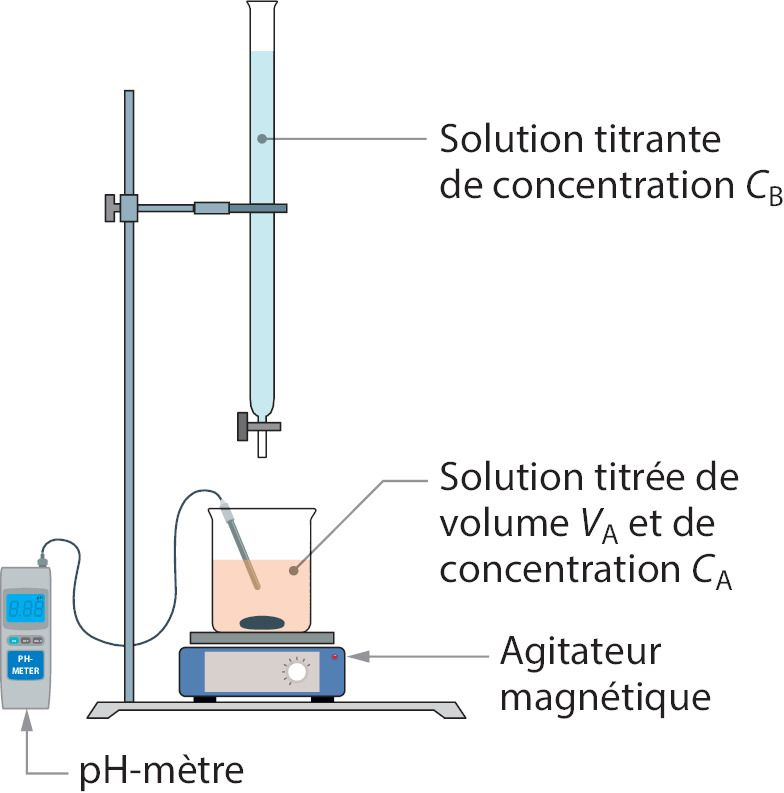



## B) Manipulation et interprétation


In [73]:
import matplotlib.pyplot as plt
import numpy as np
from openpyxl import load_workbook
workbook = load_workbook(filename="TP_1_1.xlsx")
sheet = workbook.active

In [74]:
nb_points = len(sheet["A"])
V = np.zeros(nb_points)
pH = np.zeros(nb_points)
derivee = np.zeros(nb_points)

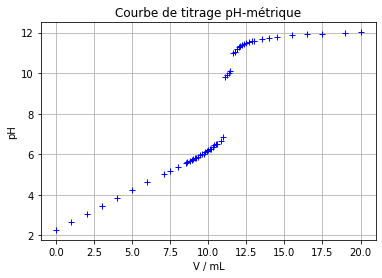

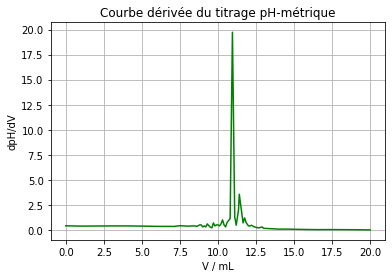

In [75]:
j=0
for i in sheet["A"]:
    V[j] = i.value
    j+=1
    
j=0
for i in sheet["B"]:
    pH[j] = i.value
    j+=1

j=0
lo = nb_points-1
for i in range(lo):
    derivee[j] = (pH[i+1]-pH[i])/(V[i+1]-V[i])
    j+=1
    
#Courbe pH en fonction du volume
plt.figure(0)
plt.plot(V,pH,'b+')
plt.xlabel('V / mL')
plt.ylabel('pH')
plt.title('Courbe de titrage pH-métrique')
plt.grid()
plt.show()

#Courbe dérivée
plt.figure(1)
plt.plot(V,derivee,'g')
plt.xlabel('V / mL')
plt.ylabel('dpH/dV')
plt.title('Courbe dérivée du titrage pH-métrique')
plt.grid()
plt.show()

L'équivalence est obtenue pour un volume $$ V_{eq} = 10,96 mL $$

Calculons le pourcentage en masse d'acide citrique dans le détartrant.

$$ W_{AH_3} = \frac{V_{fiole} C V_{eq} M_{AH_3}}{V_{pipette}V_0*30} $$

Après la mise en commun des résultats bruts, on calcule d'incertitude avec la Méthode de Monte Carlo puis l'on donne expression du résultat final.

On calcule aussi l'écart normalisé :

$$EN=\frac{|w_{exp}-w_{ref}|}{\sigma_{exp}^2-\sigma_{ref}^2}$$


le volume equivalent est 11.48
le pourcentage massique est 36.82481313626268 % avec une incertitude de 3.958284121749357 %
l'écart normalisé est 0.1699635282119346


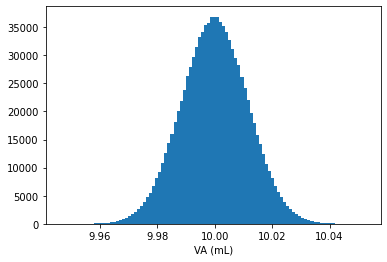

In [76]:
#On définit le nombre de tirage retenus pour la méthode de Monte-Carlo
Tirages = 10**6

#On définit une fonction qui permettra de générer une distribution à partir de la donnée des moyennes et écart-types.
def distribution_normale(Moyenne,Sigma):
    return np.random.normal(Moyenne,Sigma,Tirages)

#Le prélèvement à la pipette jaugée de 10 mL
VA = 10 #ml
tol_VA = 0.02 #mL Il s'agit de la valeur écrite sur la pipette
sigma_tol_VA = tol_VA/np.sqrt(3) #Cette expression relie la tolérance de la pipette à l'incertitude-type associée à son emploi
Dist_VA = distribution_normale(VA,sigma_tol_VA)

#Le prélèvement à la fiole jaugée de 50 mL
Vf = 50 #ml
tol_Vf = 0.06 #mL Il s'agit de la valeur écrite sur la fiole
sigma_tol_Vf = tol_Vf/np.sqrt(3)
Dist_Vf = distribution_normale(Vf,sigma_tol_Vf)

#Le prélèvement la pipette jaugée de 1 mL
Vp = 1 #ml
tol_Vp = 0.07 #mL Il s'agit de la valeur écrite sur la pipette
sigma_tol_Vp = tol_Vp/np.sqrt(3)
Dist_Vp = distribution_normale(Vp,sigma_tol_Vp)

#Volume équivalent
Veq = [10.96,11.4,11.0,13.2,11.4,11.0,11.56,13.4,9.4] #On entre dans ce tableau les valeurs de volume équivalent de tous les groupes.
Moy_Veq = np.mean(Veq) #la moyenne des valeurs
sigma_Veq = np.std(Veq) #l'écart-type des valeurs
Dist_Veq = distribution_normale(Moy_Veq,sigma_Veq) #Une distribution sur ces bases.
print("le volume equivalent est", Moy_Veq)

w=(Dist_Vf*0.0001*Dist_Veq*192.124)/(Dist_Vp*Dist_VA*3)
Moy_w = np.mean(w)
sigma_w = np.std(w)
print("le pourcentage massique est",Moy_w*100,"%","avec une incertitude de",sigma_w*100,"%")

ecart_normalise = abs(Moy_w-0.40)/np.sqrt(sigma_w**2+(0.10/np.sqrt(3)**2))
print("l'écart normalisé est",ecart_normalise)

#On peut utiliser le code suivant pour tracer une distribution
plt.figure(2)
plt.hist(Dist_VA,100)
plt.xlabel('VA (mL)')
plt.show()


L'écart normalisé est inférieur à 1 on peut donc valider ce titrage.




# II) Titrage conductimétrique de l'acide ascorbique dans l'oasis tropical
## A)Travail préparatoire

L'objectif de ce TP de titrer en retour l'acide ascorbique présent dans l'oasis tropical.
Il faudra mettre en oeuvre un titrage potentiométrique en retour de l'acide ascorbique ( $AH_2$).

Etape 1 : 
* faire réagir l'acide ascorbique ( $AH_2$) et une solution de diiode($I_2$)

$$ AH_2 + I_2 = A + 2H^+ +2 I^- $$ 

de constante $ K\circ=10^{\frac{0,06}{2}(E_{I_2/I^-}-E_{AH_2/A})} = *10^{13,6}$

Etape 2
* titrer le diiode restant avec une solution de thiosulfate de sodium($S_2O_3^{2-}$)

$$ I_2+2 S_2O_3^{2-} =2 I^- + S_4O_6^{2-}$$

de constante $ K\circ=10^{\frac{0,06}{2}(E_{S_4O_6^{2-}/S_2O_3^{2-}}-E_{I_2/I^-})} = 10^{15}$
          
Les réactions sont quantitatives (observe une équivalence). On observe un seul saut dans la courbe de la tension $U$ en fonction du volume.

Afin de déterminer le volume a l'équivalence $V_{eq}$ on utilise la méthode de la dérivée et l'on trace $\frac{dU}{dV}$ en fonction de V.

A l'équivalence les quantités de matières sont apportés en proportions stoechiométriques.

$$\frac{n_{I_2}}{1} = \frac{n_{S_2O_3^{2-}}}{2} $$

donc

$$ C_1V_1 - n_{AH_2} = \frac{[S_2O_3^{2-}]V_{eq}}{2}$$
donc 
$$ [AH_2]=(C_1V_1- \frac{[S_2O_3^{2-}]V_{eq}}{2})*\frac{1}{V_0} $$

ainsi on a la concentration massique : 

$$ C_m= [AH_2]*\frac{M_{AH_2}}{V_0} $$


Pour réaliser le titrage on utilise une burette graduée de 25mL ainsi qu'un bécher de 50mL


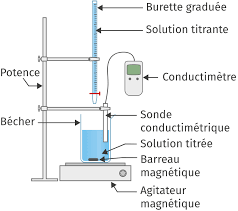

## B) Manipulation et interprétation


In [69]:
workbook2 = load_workbook(filename="TP_1_2.xlsx")
sheet2 = workbook2.active

In [70]:
nb_points = len(sheet2["A"])
V = np.zeros(nb_points)
u = np.zeros(nb_points)
derivee = np.zeros(nb_points)

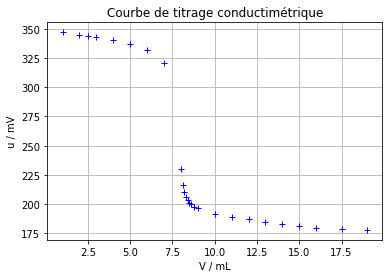

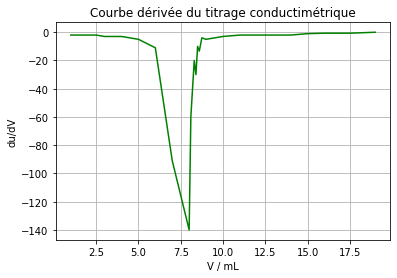

In [71]:
j=0
for i in sheet2["A"]:
    V[j] = i.value
    j+=1
    
j=0
for i in sheet2["B"]:
    u[j] = i.value
    j+=1

j=0
lo = nb_points-1
for i in range(lo):
    derivee[j] = (u[i+1]-u[i])/(V[i+1]-V[i])
    j+=1
    
#Courbe pH en fonction du volume
plt.figure(0)
plt.plot(V,u,'b+')
plt.xlabel('V / mL')
plt.ylabel('u / mV')
plt.title('Courbe de titrage conductimétrique')
plt.grid()
plt.show()

#Courbe dérivée
plt.figure(1)
plt.plot(V,derivee,'g')
plt.xlabel('V / mL')
plt.ylabel('du/dV')
plt.title('Courbe dérivée du titrage conductimétrique')
plt.grid()
plt.show()

L'équivalence est obtenue pour un volume $$ V_{eq} = 8,1 mL $$

Après la mise en commun des résultats bruts, on calcule d'incertitude avec la Méthode de Monte Carlo puis l'on donne expression du résultat final.

la concentration massique est 0.15748677702127212 g/L avec une incertitude de 0.0350758246941609 g/L


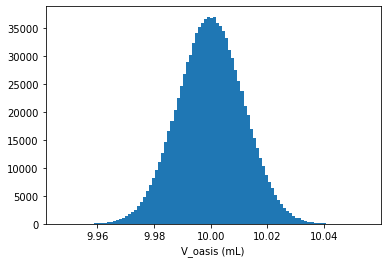

In [54]:
# On définit le nombre de tirage retenus pour la méthode de Monte-Carlo
Tirages = 10**6

#On définit une fonction qui permettra de générer une distribution à partir de la donnée des moyennes et écart-types.
def distribution_normale(Moyenne,Sigma):
    return np.random.normal(Moyenne,Sigma,Tirages)

#Le prélèvement à la pipette jaugée de la solution d'oasis de 10 mL
V_oasis = 10 #ml
tol_V_oasis = 0.02 #mL Il s'agit de la valeur écrite sur la pipette
sigma_tol_V_oasis = tol_V_oasis/np.sqrt(3) #Cette expression relie la tolérance de la pipette à l'incertitude-type associée à son emploi
Dist_V_oasis = distribution_normale(V_oasis,sigma_tol_V_oasis)

#Le prélèvement à la pipette jaugée de la solution de diiode de 10 mL
V_diiode = 10 #ml
tol_V_diiode = 0.02 #mL Il s'agit de la valeur écrite sur la pipette
sigma_tol_V_diiode = tol_V_diiode/np.sqrt(3) #Cette expression relie la tolérance de la pipette à l'incertitude-type associée à son emploi
Dist_V_diiode = distribution_normale(V_diiode,sigma_tol_V_diiode)

#Volume équivalent
Veq = [8.1,8.5,8.6,8.8,7.9,7.6,8.6,7.8,8.0] #On entre dans ce tableau les valeurs de volume équivalent de tous les groupes.
Moy_Veq = np.mean(Veq) #la moyenne des valeurs
sigma_Veq = np.std(Veq) #l'écart-type des valeurs
Dist_Veq = distribution_normale(Moy_Veq,sigma_Veq) #Une distribution sur ces bases.

w2=(((0.005*Dist_V_diiode)-0.005*Dist_Veq)*176.12)/(Dist_V_oasis)
Moy_w2 = np.mean(w2)
sigma_w2 = np.std(w2)
print("la concentration massique est",Moy_w2,"g/L","avec une incertitude de",sigma_w2,"g/L")


plt.figure(2)
plt.hist(Dist_V_oasis,100)
plt.xlabel('V_oasis (mL)')
plt.show()

# III) Titrage indirect du cuivre dans une bouillie bordelaise
## A)Travail préparatoire

L'objectif de ce TP de titrer indirectement le cuivre dans une bouillie bordelaise.
Il faudra mettre en oeuvre un titrage colorimétrique.

Etape 1 : 
* faire réagir les ions ( $Cu^{2+}$) et de 1,5g d'iodure de potassium solide

$$ 2Cu^{2+}+ 4I^- = CuI+ I_2 $$ 


Etape 2
* titrer le diiode formé avec une solution de thiosulfate de sodium($S_2O_3^{2-}$) de concentration $C_3 = 1,00*10^{-2} mol/L$ en y ajoutant de l'empois d'amidon à proximité de l'équivalence.

$$ I_2+2 S_2O_3^{2-} =2 I^- + S_4O_6^{2-}$$

de constante $ K\circ=10^{\frac{0,06}{2}(E_{S_4O_6^{2-}/S_2O_3^{2-}}-E_{I_2/I^-})} = 10^{15}$
          
Les réactions sont quantitatives (observe une équivalence). On observe une décoloration de la solution titré à l'équivalence ( car plus de $I_2$)


A l'équivalence les quantités de matières sont apportés en proprtions stoechiométriques.

$$\frac{n_{I_2}}{1} = \frac{n_{S_2O_3^{2-}}}{2} $$

donc
$$[Cu^{2+}]= \frac{[S_2O_3^{2-}]*V_{eq}}{V_0}$$


Pour réaliser le titrage on utilise une burette graduée de 25mL ainsi qu'un bécher de 50mL


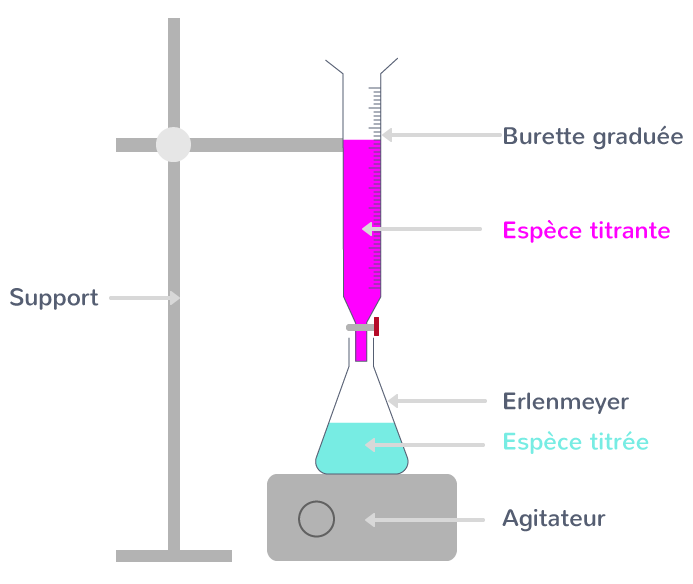

L'équivalence est obtenue pour un volume $$ V_{eq} = 10,2 mL $$




## B) Manipulation et interprétation

Après la mise en commun des résultats bruts, on calcule d'incertitude avec la Méthode de Monte Carlo puis l'on donne expression du résultat final.

In [57]:
# On définit le nombre de tirage retenus pour la méthode de Monte-Carlo
Tirages = 10**6

#On définit une fonction qui permettra de générer une distribution à partir de la donnée des moyennes et écart-types.
def distribution_normale(Moyenne,Sigma):
    return np.random.normal(Moyenne,Sigma,Tirages)

#Le prélèvement à la pipette jaugée de la solution de la bouillie bordelaise de 10 mL
V_b = 10 #ml
tol_V_b = 0.02 #mL Il s'agit de la valeur écrite sur la pipette
sigma_tol_V_b = tol_V_b/np.sqrt(3) #Cette expression relie la tolérance de la pipette à l'incertitude-type associée à son emploi
Dist_V_b = distribution_normale(V_b,sigma_tol_V_b)


#Volume équivalent
Veq3 = [10.2,10.8,10.3,10.3,10.3,9.9,10.4,9.9,9.9] #On entre dans ce tableau les valeurs de volume équivalent de tous les groupes.
Moy_Veq3 = np.mean(Veq3) #la moyenne des valeurs
sigma_Veq3 = np.std(Veq3) #l'écart-type des valeurs
Dist_Veq3 = distribution_normale(Moy_Veq3,sigma_Veq3) #Une distribution sur ces bases.

w3=63.5*(Dist_Veq3*0.01/Dist_V_b)
Moy_w3 = np.mean(w3)
sigma_w3 = np.std(w3)
print("la concentration massique est",Moy_w3,"g/L","avec une incertitude de",sigma_w3,"g/L")


la concentration massique est 0.6491323354134729 g/L avec une incertitude de 0.017666626667312557 g/L
